## Pandas를 사용한 시계열
### 6-1. Pandas로 만든 플롯의 사용자정의

In [3]:
import pandas as pd
import os 
os.listdir('data')

['df1.csv', 'df2.csv', 'df3.csv']

In [4]:
df2 = pd.read_csv('data/df2.csv')
df2

,a,b,c,d,e
0,0.039762,0.218517,0.103423,0.957904,x
1,0.937288,0.041567,0.899125,0.977680,y
2,0.780504,0.008948,0.557808,0.797510,x
3,0.672717,0.247870,0.264071,0.444358,z
4,0.053829,0.520124,0.552264,0.190008,y
5,0.286043,0.593465,0.907307,0.637898,x
6,0.430436,0.166230,0.469383,0.497701,z
7,0.312296,0.502823,0.806609,0.850519,z
8,0.187765,0.997075,0.895955,0.530390,x
9,0.908162,0.232726,0.414138,0.432007,y


<AxesSubplot:>

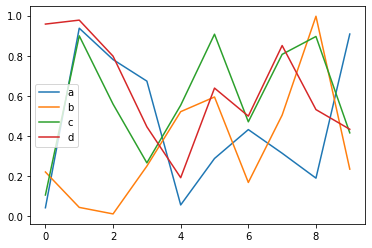

In [5]:
df2.plot.line()

<AxesSubplot:>

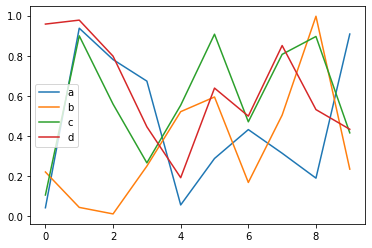

In [6]:
df2.plot()

<AxesSubplot:>

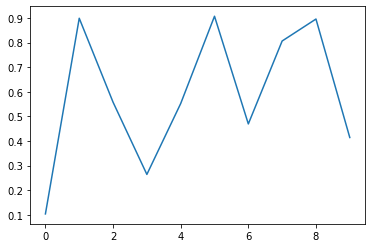

In [8]:
df2['c'].plot.line()

<AxesSubplot:>

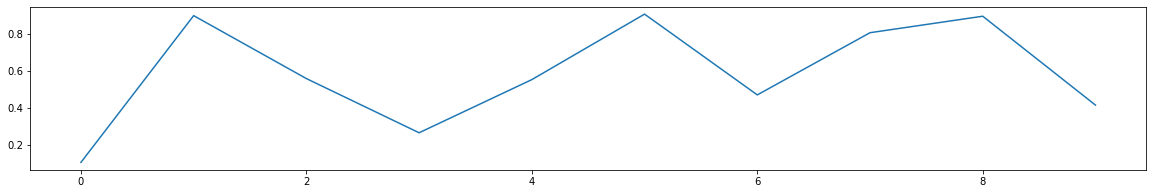

In [9]:
df2['c'].plot.line(figsize=(20,3))

<AxesSubplot:>

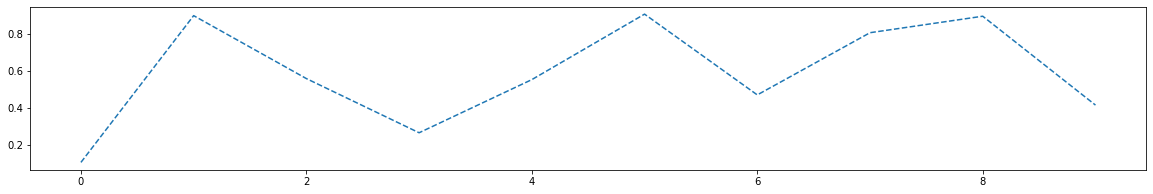

In [10]:
df2['c'].plot.line(figsize=(20,3),ls='--')

<AxesSubplot:>

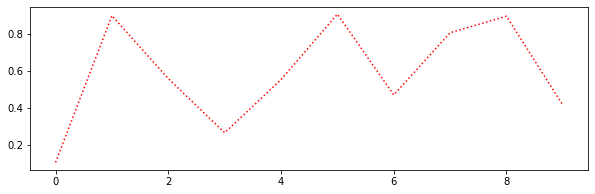

In [13]:
df2['c'].plot.line(figsize=(10,3),ls=':',c='red')

<AxesSubplot:>

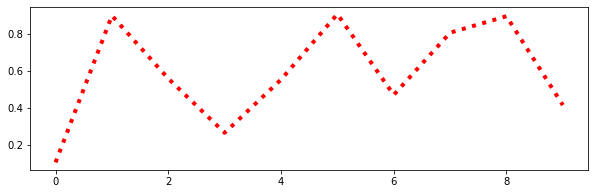

In [14]:
df2['c'].plot.line(figsize=(10,3),ls=':',c='red', lw=4)

#### Y축 레이블과 x축 레이블의 제목을 플롯 자체에 추가하는 방법

In [15]:
title = 'My Plot Title'
xlabel = 'My X Data'
ylabel = 'My y Data'

[Text(0.5, 0, 'My X Data'), Text(0, 0.5, 'My y Data')]

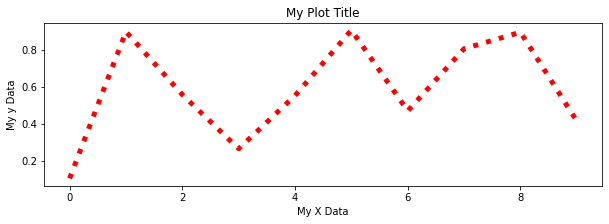

In [17]:
ax = df2['c'].plot.line(figsize=(10,3), ls=':', c='red', lw=5, title=title)
ax.set(xlabel=xlabel, ylabel =ylabel)


#### 범례를 특정 장소에 지정하는 방법
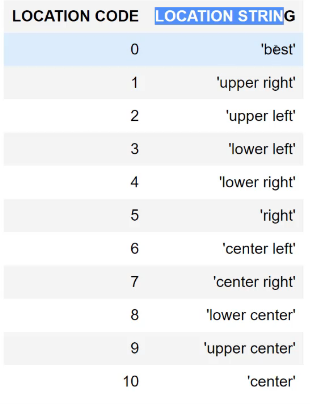

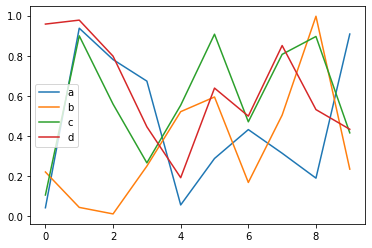

In [21]:
ax = df2.plot()
ax.legend(loc=0)

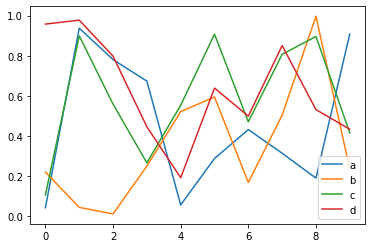

In [20]:
ax = df2.plot()
ax.legend(loc=4)

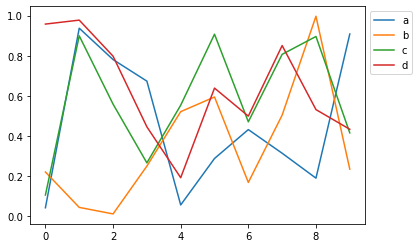

In [23]:
ax = df2.plot()
ax.legend(loc=0, bbox_to_anchor=(1.0,1.0))

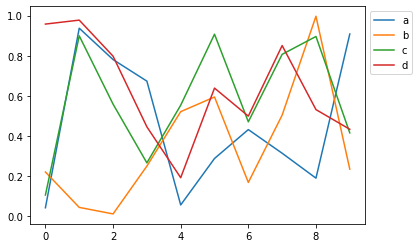

In [24]:
ax = df2.plot()
ax.legend(loc=2, bbox_to_anchor=(1.0,1.0))

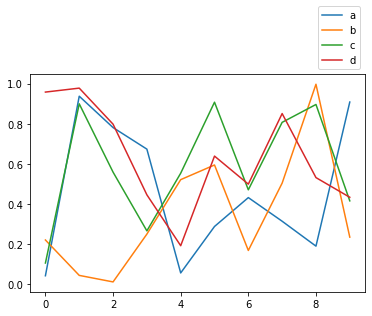

In [25]:
ax = df2.plot()
ax.legend(loc=4, bbox_to_anchor=(1.0,1.0))

`bbox_to_anchor (x축을 따라 기존 포지션에서 얼마나 떨어졌는지, y축을따라 기존 포지션에서 얼마나 떨어졌는지)`

### 6-2. Pandas 데이터 시각화 연습

In [27]:
%matplotlib inline

In [26]:
df3 = pd.read_csv('data/df3.csv')
df3

,weekday,produced,defective
0,1.Monday,73,7
1,2.Tuesday,75,10
2,3.Wednesday,86,7
3,4.Thursday,64,7
4,5.Friday,70,6
...,...,...,...
495,1.Monday,62,8
496,2.Tuesday,73,10
497,3.Wednesday,79,7
498,4.Thursday,78,6


### 6-4. Pandas를 사용한 시계열 개요
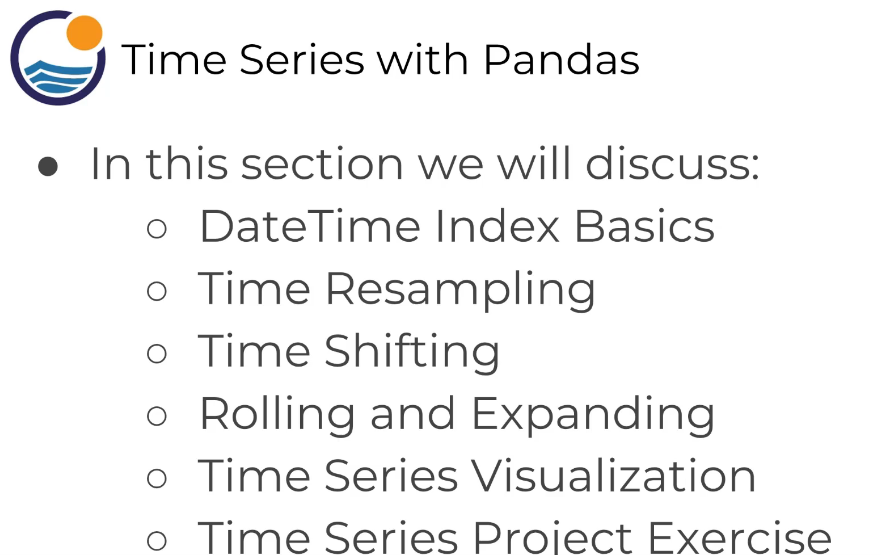

- 타임 스탬프 데이터가 무엇인지
- DataTime 인덱스가 무엇인지
- 실제 특성 시간 및 날짜 정보가 담긴 객체를 다루고 시,분,월 또는 연도 간의 차이를 이해할 수 있는 기본기
- 시계열 데이터셋을 처리할 수 있는 pandas 특정 유틸리티들(시간 샘플링, 시간 이동, 롤링 및 확장, 시계열 데이터 시각화 세부사항)
- 시계열 투영 연습 문제 풀이

### 6-5. DateTime 인덱스 - Part 1(10분)

In [28]:
from datetime import datetime

In [29]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

# 시간은 24시간 형식 0-24

In [32]:
my_date = datetime(my_year, my_month, my_day)

In [33]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

datetime 객체 생성시, 기준 값 정해주지 않으면 시간 기본값 0 

In [34]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_min, my_sec)
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [35]:
my_date_time.day

2

In [36]:
my_date_time.hour

13

In [37]:
type(my_date_time)

datetime.datetime

`Numpy datetime`

In [38]:
import numpy as np

- 일반문자열로 numpy가 인식

In [39]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'])

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

- dtype을 datetime으로 지정

In [42]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

- datetime64[D] 로 기본적으로 Numpy가 일 수준의 날짜 정밀도를 적용했음
- 다른 수준의 정밀도를 입력하고 싶으면 'datetime64[Y]' 가능 : 날짜 타임스탬프 코드와 관계없이 최대 연도 수준까지만 정밀도 유지

In [43]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [45]:
np.array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[h]')

array(['2020-03-15T00', '2020-03-16T00', '2020-03-17T00'],
      dtype='datetime64[h]')

In [47]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [48]:
np.arange('2018-06-01','2018-06-23',7, dtype='datetime64[D]')   # D : 일, h : 시, Y : 년

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [49]:
np.arange('1968', '1976', dtype= 'datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

### 6-6. DateTime 인덱스 - Part2(12분)

- pandas는 datetime 객체에 아주 유연성이 있고, datetime 객체를 위한 내장 유틸리티가 많이 있음

In [51]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2020-01-01', periods=7, freq='Y')

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [54]:
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

- 기본 날짜는 미국 날짜여서, 원하는 날짜 형식이 있다면 format으로 지정해줘야 함

In [59]:
pd.to_datetime(['2/1/2018','3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [60]:
pd.to_datetime(['2--1--2018','3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

#### pandas datetime 분석

In [61]:
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-1.33148771  0.58184588]
 [-0.93775633 -0.55825183]
 [ 0.66725976 -0.47033375]]


In [65]:
idx = pd.date_range('2020-01-01', periods=3, freq='D')
idx

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [66]:
df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2020-01-01,-1.331488,0.581846
2020-01-02,-0.937756,-0.558252
2020-01-03,0.667260,-0.470334


In [67]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [68]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [69]:
df.index.argmax()

2

In [70]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [71]:
df.index.argmin()

0

### 6-7. 시간 리샘플링(12분)
- 일종의 시간 빈도를 기반으로 집계를 하게 됨(groupby 연산과 유사함)
- 예를들면 일일 데이터를 가져와 월별 데이터로 샘플링 하거나, 월 평균을 내거나 한 달 합계를 낼 수 있음

In [85]:
df = pd.read_csv('data/Starbucks.csv', index_col='Date')
df.head(5)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [75]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [86]:
df = pd.read_csv('data/Starbucks.csv', index_col='Date', parse_dates=True)
df.head(5)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [77]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

- 추가적인 매개변수 : `index_col=컬럼명`, `parse_dates=True`

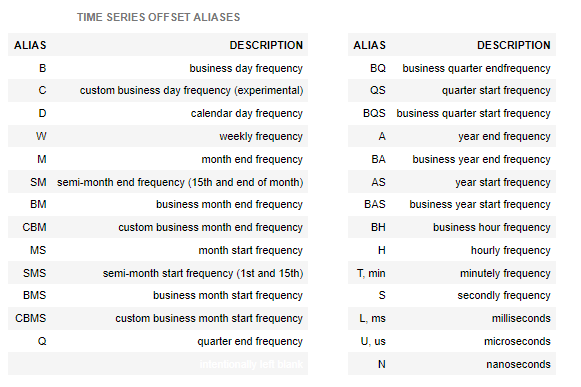

In [78]:
# 일일 데이터를 연간 데이터로 리샘플링 ( rule='A')

df.resample(rule='A')

- 연간 모든 항목의 합계? 연간 모든 항목의 평균? 

In [79]:
# 일일 데이터를 연간 데이터로 리샘플링 ( rule='A')

df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [80]:
def first_day(entry):
    if len(entry) != 0: #누락된 데이터가 없다면
        return entry[0]  # 첫번째 항목을 반환해라

In [81]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


#### 리샘플링을 플로팅과 결합

<AxesSubplot:xlabel='Date'>

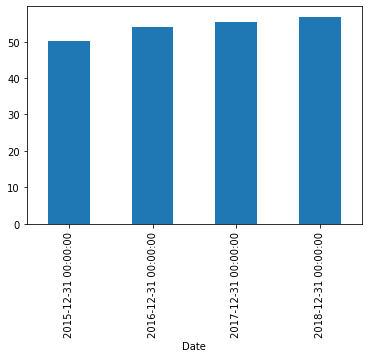

In [82]:
df['Close'].resample('A').mean().plot.bar()

- 스타벅스의 평균 종가가 증가하는 일반적인 추세를 보여주고 있음

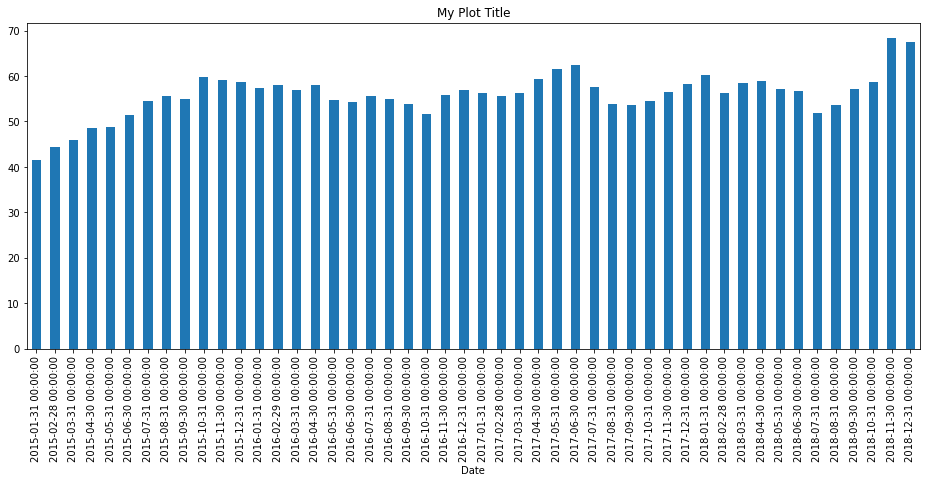

In [84]:
# 종가를 가져서 리샘플링, 월별 최대 종가를 가져와서 max값 플로팅 
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

## 6-8. 시간 이동
- Pandas의 시간 이동
: 모든 데이터를 위 또는 아래로 시계열 인덱스를 따라 이동시켜야 하는 수가 있음


In [89]:
df = pd.read_csv('data/Starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


#### 주어진 행 수에 대해 전체 Date 인덱스를 이동

In [90]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [91]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


- 첫 번째 행은 빈 데이터 포인터를 얻게 되고 마지막 데이터 행의 데이터를 잃게 됨

In [93]:
df.shift(5)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,64.47,15143054.0
2018-12-26,64.92,10523476.0
2018-12-27,64.06,14390146.0


In [95]:
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


In [106]:
# 뒤로 밀린 행을 NaN 값이 아닌 다른 값으로 채우고 싶을 때 fill_value 인자 사용
df.shift(-1, fill_value=0).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238
2018-12-26,63.20,11308081
2018-12-27,63.39,7712127
2018-12-28,64.40,7690183
2018-12-31,0.00,0


In [96]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [99]:
# 모든 데이터를 앞으로 한달 이동 시키는 방법
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


### 6-9 Rolling과 Expanding(10분)

In [108]:
df = pd.read_csv('data/Starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


<AxesSubplot:xlabel='Date'>

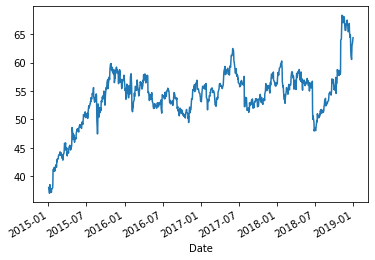

In [110]:
df['Close'].plot()

<AxesSubplot:xlabel='Date'>

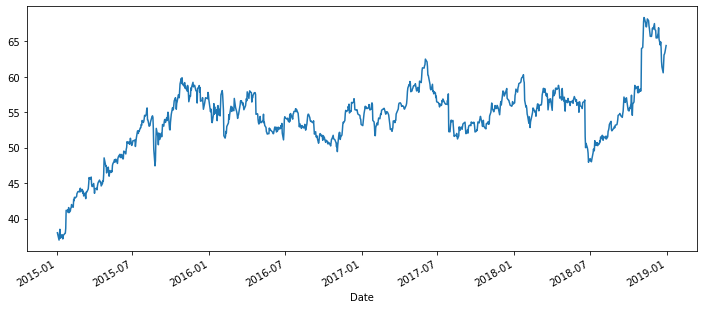

In [111]:
df['Close'].plot(figsize=(12,5))

#### rolling mean 추가 하는 것 (작은 창을 생성)

In [112]:
# 7일 간의 섹션을 살펴본 다음에 일종의 집계함수 수행

df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


- 평균을 구하려는 7개의 값에 도달하지 않았기 때문에 NaN
- 롤링 창을 사용하는경우 첫 n-1, 이경우엔 n-1 = 6 평균을 낼 만큼 충분하지 않음

<AxesSubplot:xlabel='Date'>

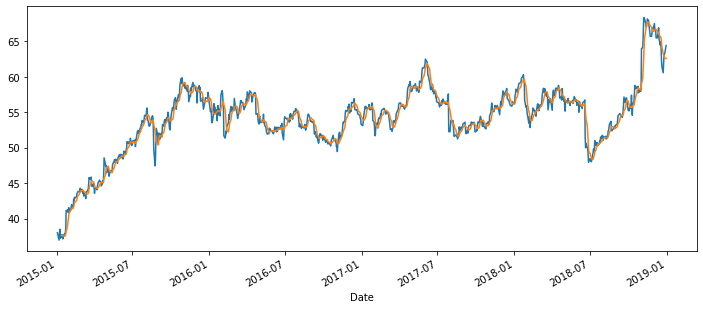

In [113]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

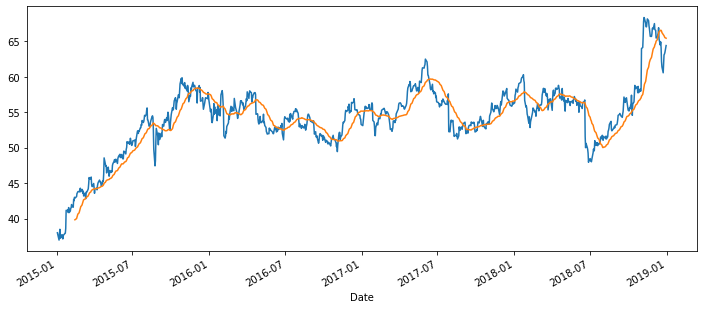

In [114]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

- 30일 롤링 평균은 30일짜리 창 당 평균 가격을 원한다는 것

<AxesSubplot:xlabel='Date'>

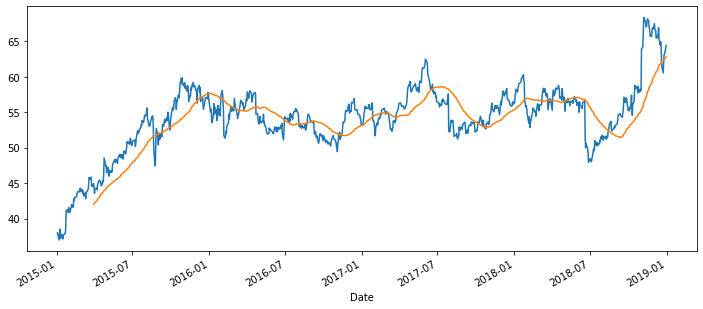

In [115]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()

- window 크기의 창이 작아질수록 원본 데이터에 들어 맞는 고수준의 추세
- window 크기의 크기가 커지면 일반적인 추세를 보여줌

In [116]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN
...,...,...,...
2018-12-24,60.5600,6323252,65.963703
2018-12-26,63.0800,16646238,65.791913
2018-12-27,63.2000,11308081,65.647000


<AxesSubplot:xlabel='Date'>

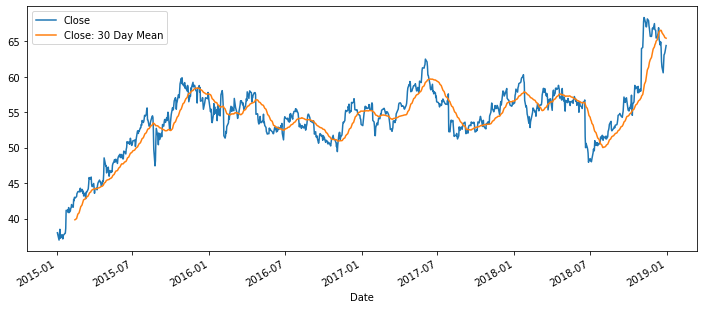

In [117]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

- 종가와 30일 평균 종가를 볼 수 있음

#### expanding
- 롤링 창에 해당하는 날짜 값을 계산하는 대신, 시계열의 시작점부터 모든 것을 계산에 넣고 싶을 때 (모든 시점)
- 예를 들면 지난 7일 동안의 평균을 계산하는 대신, 모든 이전 데이터를 확장된 평균 집합에서 계산하는 것 

<AxesSubplot:xlabel='Date'>

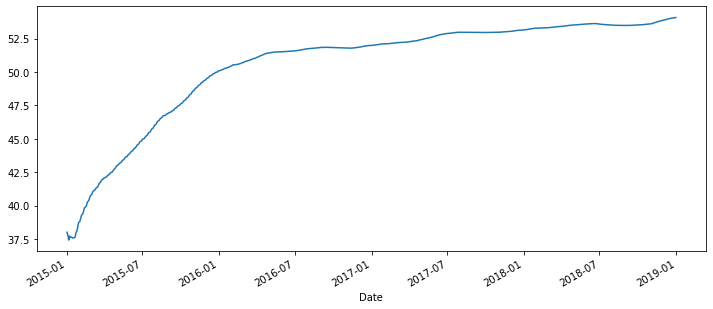

In [118]:
df['Close'].expanding().mean().plot(figsize=(12,5))

- 확장 플롯은 항상 시작 부분이 저런식으로 보임(특별한 이상 행동이 없으면 본질적으로 이렇게 보임)
- 오른쪽 상단에 위치한 마지막 지점은 전체 데이터 프레임의 모든 행에 대한 mean 또는 average 평균 값이 됨 ( 전체 열의 평균)

### 6-10 시계열 데이터 시각화 - Part1(11분)
- 실제 플롯 유형으로 작업하는 방법(서식 지정, 제목 추가, 축 레이블 추가)

In [121]:
df = pd.read_csv('data/Starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [122]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [123]:
# df.index = pd.to_datetime(df.index)

<AxesSubplot:xlabel='Date'>

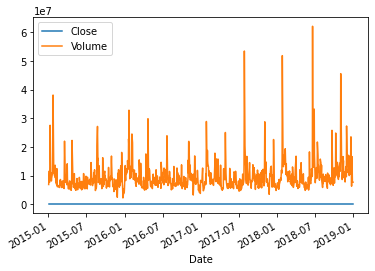

In [124]:
df.plot()

- 종가는 평평한 선 처럼 보임 스케일과 y값 차이 이기 때문에
- y 축은 6*10&7 (le7 에서 보다시피)

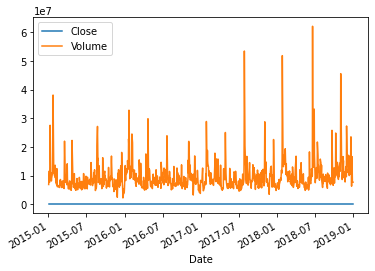

In [125]:
df.plot();

- matplotlib.axes._subplots 줄을 안보이게 하려면 ; 루가하면 추가줄을 없애줌

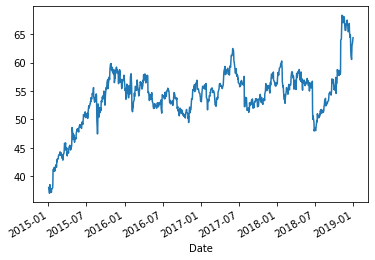

In [126]:
df['Close'].plot();

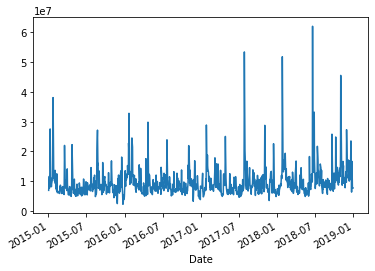

In [129]:
df['Volume'].plot();

In [130]:
title = 'Title'
ylabel = 'y label'
xlabel = 'x label'

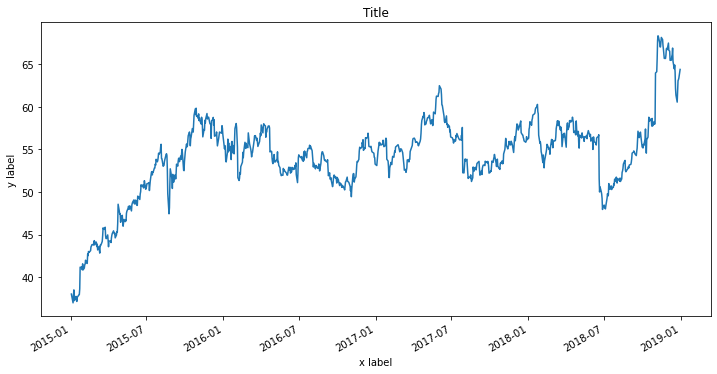

In [135]:
# y축 레이블, x축 레이블을 추가하려면 플롯을 변수로 할당해야 함

ax = df['Close'].plot(figsize=(12,6), title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### 축 자동 스케일 (autoscale)


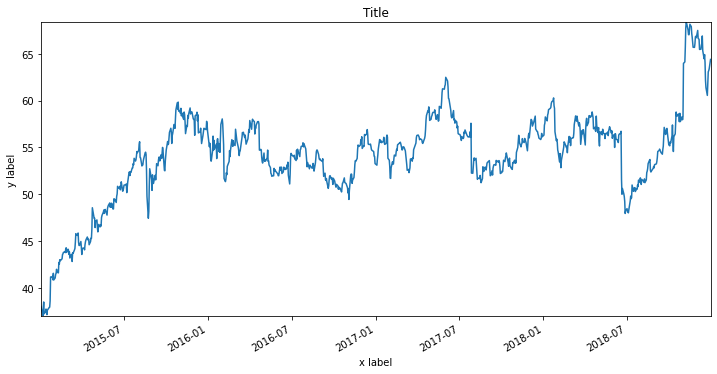

In [137]:
ax = df['Close'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='both', tight=True)  # 두 축 모두 스케일
ax.set(xlabel=xlabel, ylabel=ylabel);

- autoscale을 통해 추가 공백이 생기지 않음

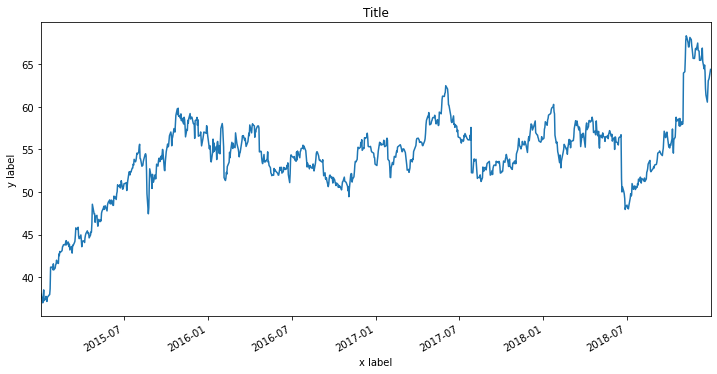

In [138]:
ax = df['Close'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='x', tight=True)  # 두 축 모두 스케일
ax.set(xlabel=xlabel, ylabel=ylabel);

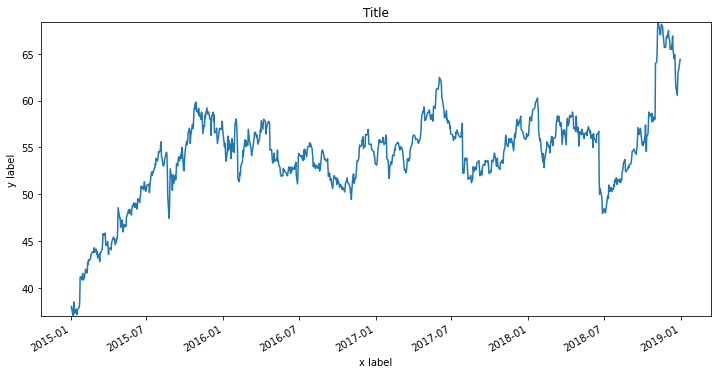

In [139]:
ax = df['Close'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='y', tight=True)  # 두 축 모두 스케일
ax.set(xlabel=xlabel, ylabel=ylabel);

#### x축 범위를 특정한 시간 범위로 설정하는 방법
(1) 데이터 프레임에서 편집하기

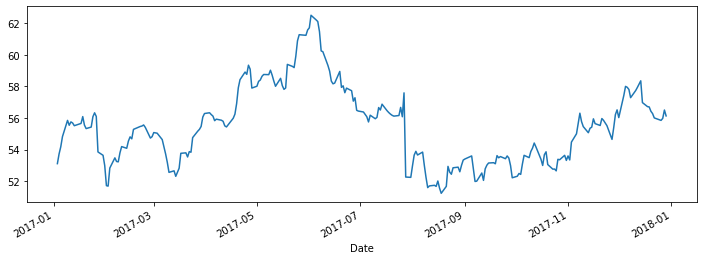

In [144]:
# 2017년만

df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4));

(2)

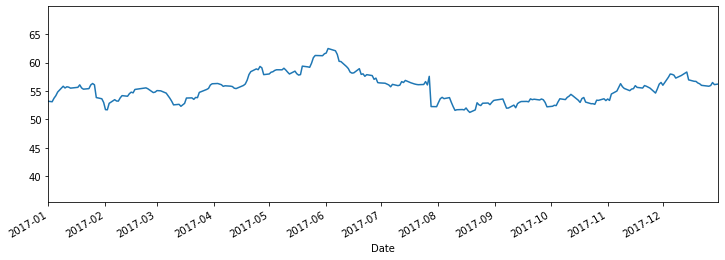

In [146]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01', '2017-12-31']);

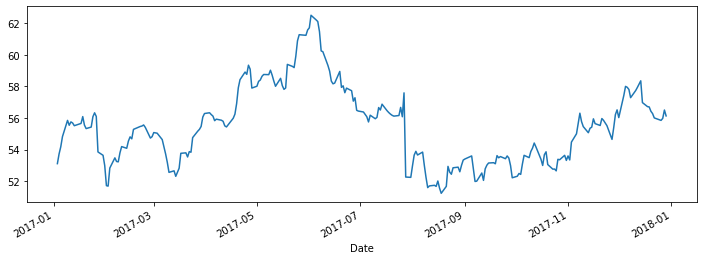

In [147]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4));

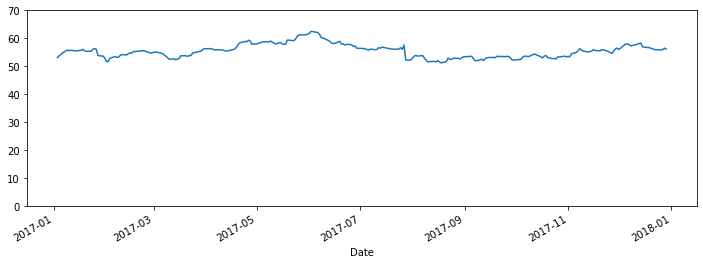

In [148]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4), ylim=[0,70]);

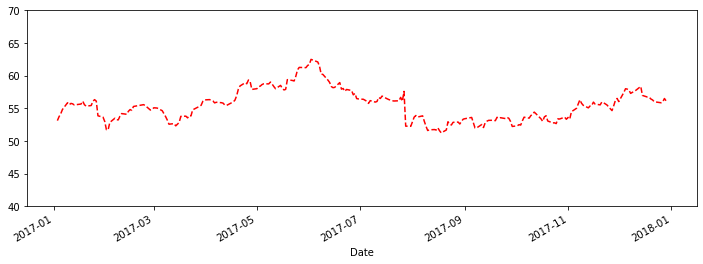

In [149]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4), ylim=[40,70], ls='--', c='red');

## 7장 Statsmodels을 이용한 시계열 자료 분석

### 7-1(34강), 7-2(35강), 7-3(36)강이 시계열 데이터 시각화여서 여기루

## 7-1. 시계열 데이터 시각화 - part 2 

#### 날짜 형식을 지정하는 방법, x축 눈금 수정, 주요축과 보조 축 수정 (X축 눈금 날짜 위치, 좌표선 설정)

In [151]:
from matplotlib import dates

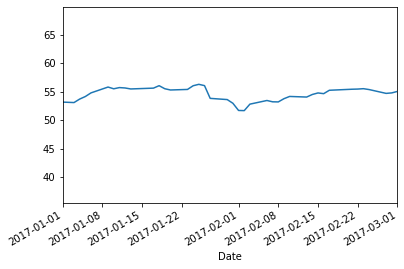

In [154]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01']);

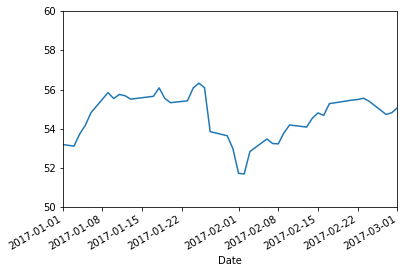

In [155]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60]);

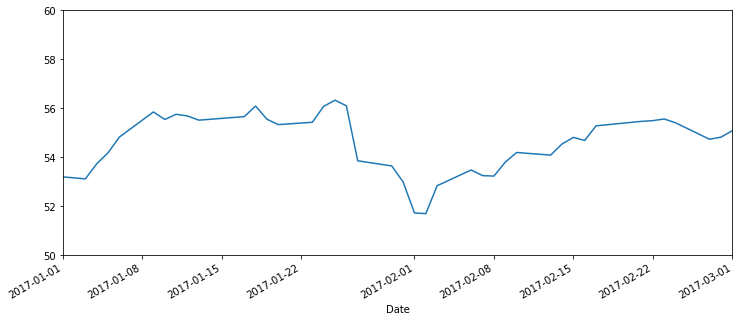

In [156]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5));

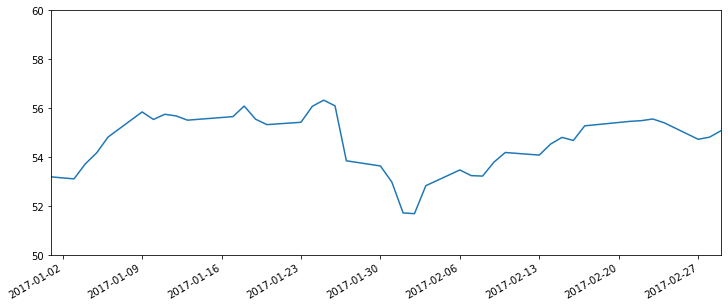

In [161]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

- x축 눈금 간격이 좋아졌음. 간격으로 배치되어 있고 더 이상 매월 첫일을 표시하지 않음
- WeekdayLocator가 하는 일이며, byweekday=0에 날짜가 부합함. 0은 월요일

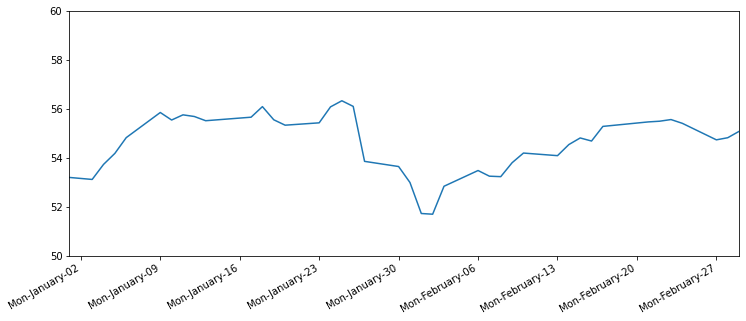

In [162]:
# 형식의 기본값은 년-월-일 datetime 인덱스 형식

ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d')) # 일-전체 월 이름-실제날짜형식으로 

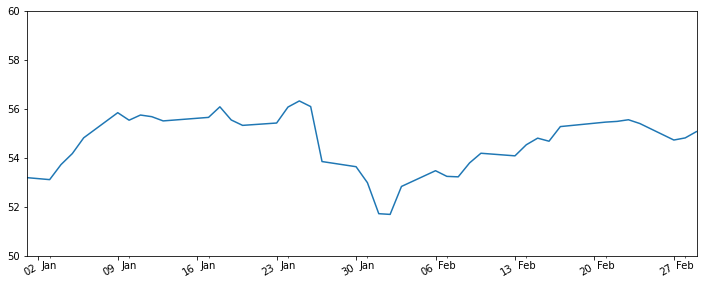

In [166]:
# 형식의 기본값은 년-월-일 datetime 인덱스 형식

ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d')) # 일-전체 월 이름-실제날짜형식으로 

ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

- 주요 축에 지정한 숫자가 있고 보조 축에 설정한 월 이름이 있음 (이상한 중첩)

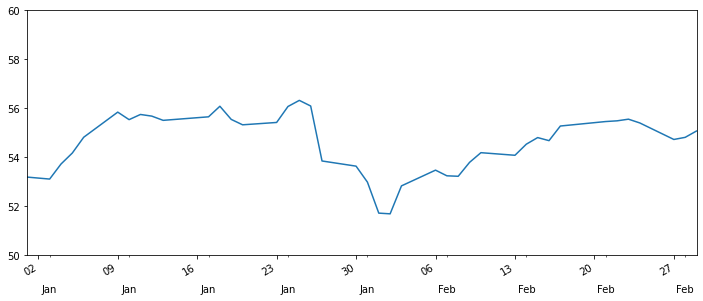

In [167]:
# 형식의 기본값은 년-월-일 datetime 인덱스 형식

ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d')) # 일-전체 월 이름-실제날짜형식으로 

ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

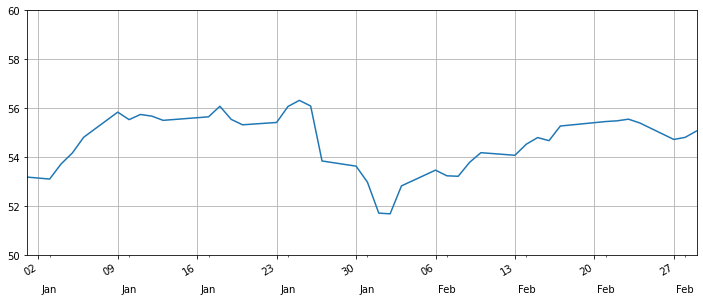

In [169]:
# 형식의 기본값은 년-월-일 datetime 인덱스 형식

ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60], figsize=(12,5))
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d')) # 일-전체 월 이름-실제날짜형식으로 

ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)